# FLOWID: 5

## Question 1: Profit Optimization for Hotel Room Sales

In [10]:
## Question A ##

## 1 ##

# I did not understand how to implement the floor function, meaning that i get get a decimal value in the last example.
# However i still believe that my approach is correct :)

# I start by making the function.
def demand(price): # Takes the argument p
    demand = (1000-2.2*price)  # The function as described in the assignment
    return demand

## 2 ##
# Make the revenue function:
def revenue(price): # this also uses price

    # Start by getting demand 
    d = demand(price)

    # Then calculate revenue as price*demand
    revenue = d*price

    # Output the revenue
    return revenue 

## 3 ##
# Make the cost function
def total_cost(price):

    # Get demand again:
    d = demand(price)

    cost = 0 # enitialize cost at zero.

    # Then check if there are booked more than 100 rooms, which increase the administration fee.
    if d > 100:
        cost = cost + 20000

    else:
        cost = cost 

    # Then calculate the variable cost.
    if d < 60: # Check if number of rooms smaller than 60, if this is the case the cost will 50 
        cost = cost + d*50
    
    elif d > 150: # Check if there is booked more than 150. If this is the case the cost will be 30
        cost = cost + d*30

    else: # If not we are in the range 60 - 150 meaning that the cost will be 40    
        cost = cost + d*40

    return cost    



## Question B ## 

#Mixing it all togehter:

def profit_machine(price): # Make the function.

    # Then i calculate the demand, cost and revenue at a price level, using the functions from before.
    Demand = demand(price)
    Cost = total_cost(price)
    Revenue = revenue(price)

    # Calculate the profit.
    profit = Revenue - Cost

    # Then return a dictionary with the demand, price and profit:
    return {"Price": price, "Demand": Demand, "Profit" : profit }


# Check out the profit_machine, when price is 400

profit_machine(400)

# I can tell that at a price of 400, demand will be 120 room and make a profit of 23200 dollars.

{'Price': 400, 'Demand': 119.99999999999989, 'Profit': 23199.99999999996}

## Question 2: Hotel Reservation Management

In [23]:
### Task A ###

# Making the dictionaries:

hotel = {
    "rooms_avaliable": 20, # I assume that i have 20 rooms free.
    "adr_threshold": 50,
    "bookings": [92, 88] # Contains other booking id which was accepted.
}

reservation = {
    "rooms": 2,
    "adr": 40,
    "id": 92
}

# Extra reservation to illustrate function:
reservation2 = {
    "rooms": 2,
    "adr": 60,
    "id": 93
}

# I understand that we have a system which takes 1 reservation (the reservation dict) and by looking at the hotel dictionary
# determines if we can accept this booking at then update the hotel dict.

# Make the function:
def process_reservation(hotel,reservation): 

    # I use a if statment which the "and " to check both conditions at the same time
    if hotel["rooms_avaliable"] > reservation["rooms"] and reservation["adr"] >= hotel["adr_threshold"]:

        # If true i subtract the rooms from rooms avaliable
        hotel["rooms_avaliable"]= hotel["rooms_avaliable"] - reservation["rooms"]
        # and append the id to the bookings list.
        hotel["bookings"].append(reservation["id"])

        # Print if the booking was accepcted.
        print("Booking accepted")

    else: # If not fulfilled i do nothing
        print("Booking declined")

    return hotel    


# Check with first booking. As one can tell, eventhough we had space, the booking was declined, because the adr was to low.
process_reservation(hotel,reservation)


Booking declined


{'rooms_avaliable': 20, 'adr_threshold': 50, 'bookings': [92, 88]}

In [24]:
# Checking with reservations 2. 
# We accept this booking as we have space and the adr is above the threshold.
# the id is added to booking as intended and the rooms avaliable is decreased.
process_reservation(hotel,reservation2)

Booking accepted


{'rooms_avaliable': 18, 'adr_threshold': 50, 'bookings': [92, 88, 93]}

In [37]:
## TASK B ##

hotel = {
    "rooms_avaliable": 20, # I assume that i have 20 rooms free.
    "adr_threshold": 50,
    "bookings": [92, 88] # Contains other booking id which was accepted.
}

# List of bookings
reservations_multiple = [
    {"rooms": 2, "adr": 60, "id": 1},
    {"rooms": 2, "adr": 40, "id": 2},
    {"rooms": 3, "adr": 70, "id": 3},
    {"rooms": 2, "adr": 50, "id": 2}]


# I had problems calling the precius function. Therefore i just made a new one which handles a list of bookings
# The code is almost identical i have however made changes to how i acces the list of dictionaries = r["adr"] rather than reservation["adr"]

def multiple_bookings(reservations_multiple, hotel):

    # For all observations in reservations_multiple i do the following.
        for r in reservations_multiple:
                if hotel["rooms_avaliable"] > r["rooms"] and r["adr"] >= hotel["adr_threshold"]: # Check conditions

                    # If true i subtract the rooms from rooms avaliable
                    hotel["rooms_avaliable"]= hotel["rooms_avaliable"] - r["rooms"]
                     # and append the id to the bookings list.
                    hotel["bookings"].append(r["id"])

                    # Print if the booking was accepcted.
                    print(f"Booking {r['id']} accepted")

                else: # If not fulfilled i decline
                    print(f"Booking {r['id']} declined")

        return hotel 


multiple_bookings(reservations_multiple, hotel)

# As you can tell from below, we can see which booking was accepted or declined based on id.
# We also get the list of bookings, as well as the updated number of rooms availiabe = 13 (20-3-2-2)


Booking 1 accepted
Booking 2 declined
Booking 3 accepted
Booking 2 accepted


{'rooms_avaliable': 13, 'adr_threshold': 50, 'bookings': [92, 88, 1, 3, 2]}

## Question 3

The dataset is provided in the `data.csv` file.

In [40]:
## TASK A ##

# I load pandas and the csv
import pandas as pd

df = pd.read_csv("data.csv")

## EDA ##

# As the dataset is quite small i have no need to print the columns. Instead i use describe to get a basic descriptive statistics
df.describe()


,adr,num_rooms,month
count,7300.000000,7300.000000,7300.000000
mean,240.867945,2.996575,6.526027
std,119.865884,1.415613,3.448088
min,44.000000,1.000000,1.000000
25%,148.000000,2.000000,4.000000
50%,222.000000,3.000000,7.000000
75%,310.000000,4.000000,10.000000
max,716.000000,5.000000,12.000000


<Axes: xlabel='room_type', ylabel='count'>

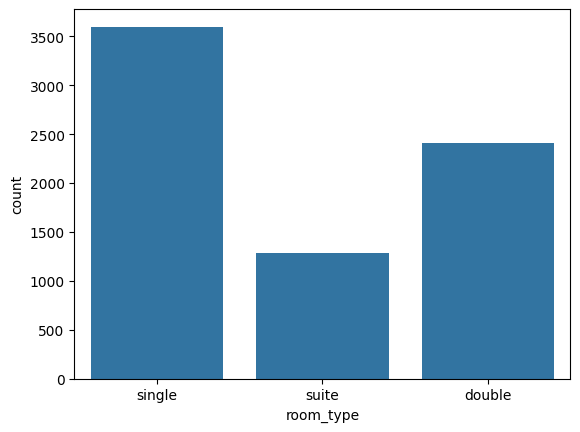

In [51]:
# To understand the data i make some simple countplot for the categorical values and look aa density plot for adr.
import seaborn as sns

sns.countplot(data=df, x="room_type") # as expected there are most single and double rooms and only few suites.


<Axes: xlabel='room_type', ylabel='count'>

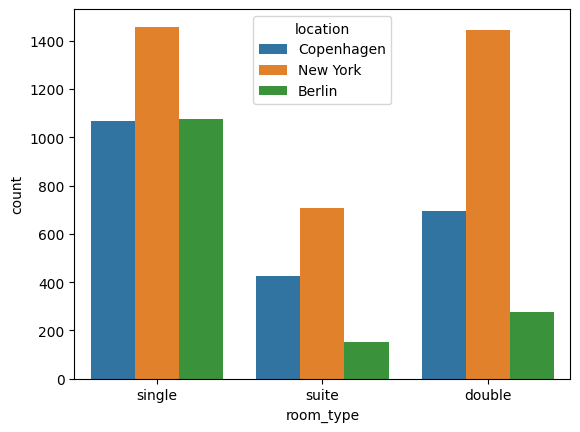

In [52]:
# We can also look at the roomtype for different location:
sns.countplot(data=df, x="room_type", hue="location") 

# we see that newyork in general have more rooms that berlin and copenhagen
# and that copenhagen in general have a bit more suites and double rooms than berlin.


<Axes: xlabel='adr', ylabel='Density'>

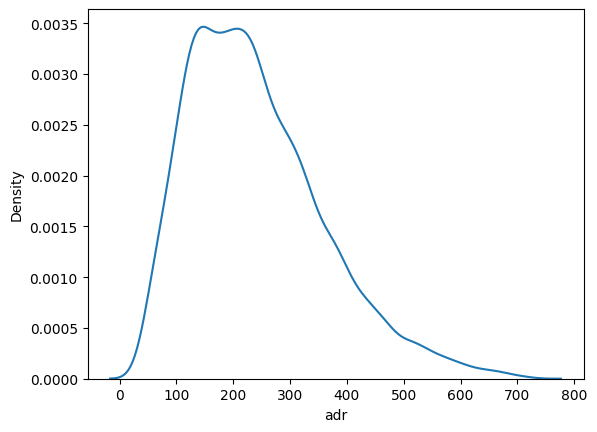

In [53]:
# Density plot of ADR
sns.kdeplot(x = 'adr', data = df) # We see that the adr is right skewed which makes seens, as most room are about 200 dollars. 
# and then some rooms, most likely the suites, are more expensive.


<Axes: xlabel='adr', ylabel='Density'>

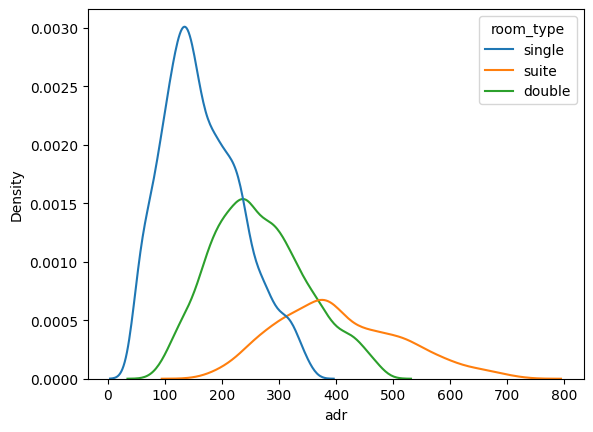

In [48]:
# Using hue we can look at the adr for the different rooms, which shows that it is in fact
# The suites which are more expensive
sns.kdeplot(x = 'adr', hue="room_type", data = df)

<Axes: xlabel='adr', ylabel='Density'>

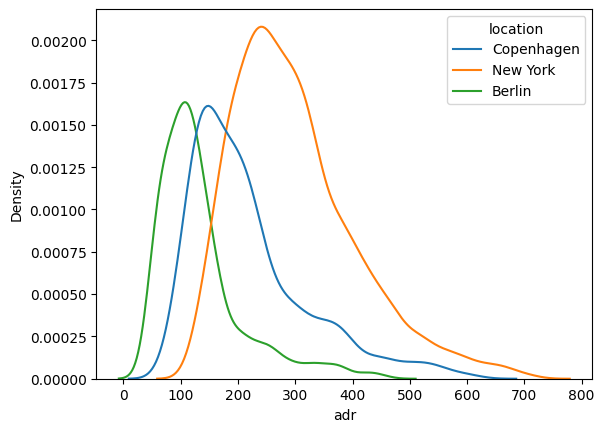

In [55]:
# Another interesting plot is the adr for each city:
sns.kdeplot(x = 'adr', hue="location", data = df)

# Here we see that adr is highest in new york and lowest in berlin.

<Axes: xlabel='month', ylabel='mean'>

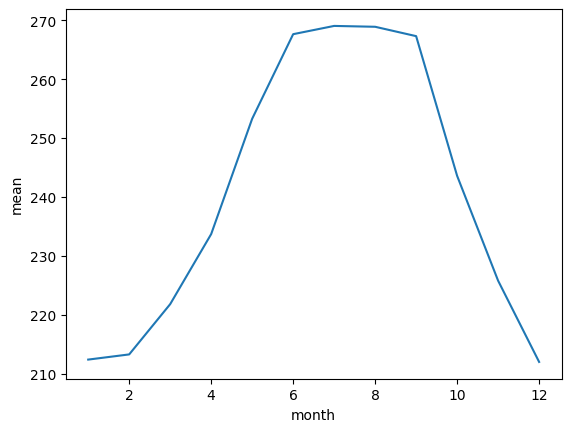

In [65]:
# As the data only apper to be 2023 data, i group by the month collumn and get the mean adr to determine if adr changes over time.

df_plot_1 = df.groupby("month")["adr"].mean().reset_index(name="mean")

# Then make the plot
sns.lineplot(data=df_plot_1, x="month", y="mean")

# Looking at the plot below, it would apper that adr is highest between may and september

<Axes: xlabel='month', ylabel='count'>

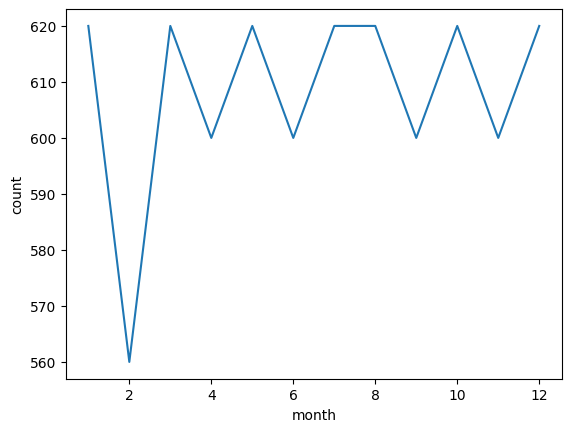

In [74]:
# I also group by month and count the oberservation, to see which month is most frequenty booked and if there is a pattern here.

df_plot_2 = df.groupby("month")["adr"].count().reset_index(name="count") # Just counting instead of finding the mean

# Then make the plot
sns.lineplot(data=df_plot_2, x="month", y="count")

# A bit to my surpise, with exeption to february there is not a huge difference in the number of bookings 
# througout the year. I suspect that the dataset may have been normalized, making this plot irellevant.


In [80]:
# I groupby location and room_type as asked in the assignment 
# and display summary for ADR, which i believe is the only variable it makes sense to look at.

df_2 = df.groupby(['location','room_type'])[['adr']].agg(['sum','mean'])

df_2

adr            
                         sum        mean
location   room_type                    
Berlin     double      46810  169.601449
           single     107837  100.313488
           suite       46428  305.447368
Copenhagen double     154022  222.253968
           single     162529  152.466229
           suite      160478  376.708920
New York   double     438711  303.606228
           single     328130  225.054870
           suite      313391  442.018336

In [93]:
## TASK B ##

# I choose to look at single rooms in copenhagen.

# Although there was an example form one of the previus exam, i could not replicate 
# the sorting and grouping in one line. Therefore they are in 2 lines of code instead.

# Here i define my criteria for the data. ( ADR level are from the quantiles, where 148 is the lower one.)
new_data = df[(df['room_type'] == 'single') & (df['location'] == "Copenhagen") & (df['adr'] <= 148)]

room_df = new_data["num_rooms"].sum()

room_df


np.int64(1642)

In [128]:
# Seeing that the code above work i make my function.
# Which takes my data, my specified room_type, location and adr_level

data = [] # Where i will store my data before turning into a dataframe

def demand(df,room_type,location,adr_level):

    # Same logic as before to select my data.
    new_data = df[(df['room_type'] == room_type) & (df['location'] == location) & (df['adr'] >= adr_level)]
    room_df = new_data["num_rooms"].sum()

    # Check if demand is greater than 0, then append it to a data.
    if room_df > 0:
        data.append({"Room_type": room_type, "location" : location, "Demand": room_df, "Adr_level":adr_level})

    else: 
        print()

    return data    


In [135]:
# Then i make a loop, one for copenhagen and one for berlin.
# To get the demand function for single rooms in these cities

for adr_levels in range(50, 601, 50): # For values in this list run the demand function
    demand(df,"single","Copenhagen",adr_levels)

for adr_levels in range(50, 601, 50): # For values in this list run the demand function
    demand(df,"single","Berlin",adr_levels)

# And turn it into a dataframe
df_demand = pd.DataFrame(data)

df_demand

,Room_type,location,Demand,Adr_level
0,single,Copenhagen,3198,50
1,single,Copenhagen,2927,100
2,single,Copenhagen,1516,150
3,single,Copenhagen,484,200
4,single,Berlin,3186,50
5,single,Berlin,1648,100
6,single,Berlin,256,150
7,single,Copenhagen,3198,50
8,single,Copenhagen,2927,100
9,single,Copenhagen,1516,150


<Axes: xlabel='Adr_level', ylabel='Demand'>

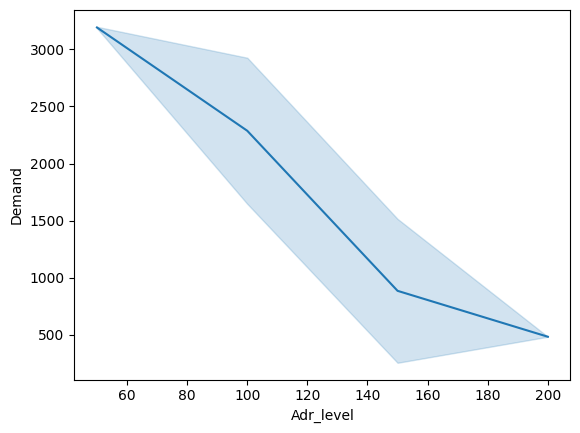

In [131]:
# Then i make a plot of the demand.
sns.lineplot(data=df_demand, x="Adr_level", y="Demand")

# The plot below makes a lot of sense, if there is a low adr (e.g cheap room) more people are willing rent
# However as adr increase less people are able to pay.


<Axes: xlabel='Adr_level', ylabel='Demand'>

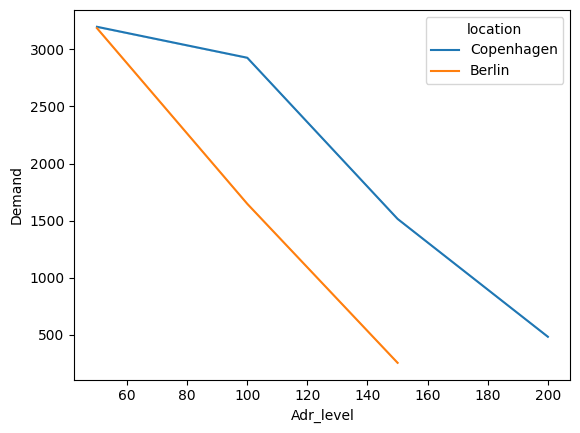

In [136]:
# Answearing this question i realize that i should had made a function which got data for all room and locations.
# I do however not have time for this now, and i will therefore just display the difference in demand for single rooms 
# in copenhagen and berlin.

sns.lineplot(data=df_demand, x="Adr_level", y="Demand", hue="location")

# As one can tell demand seem to decrease faster in berlin, which could reflect that 
# prices in copenhagen in genereal are higher or that people travelling to copenhagen have
# a higher willingness to pay.

## Questiono C

The most important thing is that this is transaction data. From my understanding it is confirmed bookings.
I therefore find i highly onlikely that a company or customer would give us acces to this data.

Another reflection is that we have worked with scrapping in this course. So let just assume that we wanted listing prices
for different hotel rooms. Even this my be hard to get on a continuos basis, as websites sometimes make changes in their html. 
Furthermore some booking website may request that you are a member to look at their prices, which could also be an obstacle


## Question 4

The code for this question is not meant to be run and is therefore only included as an image.

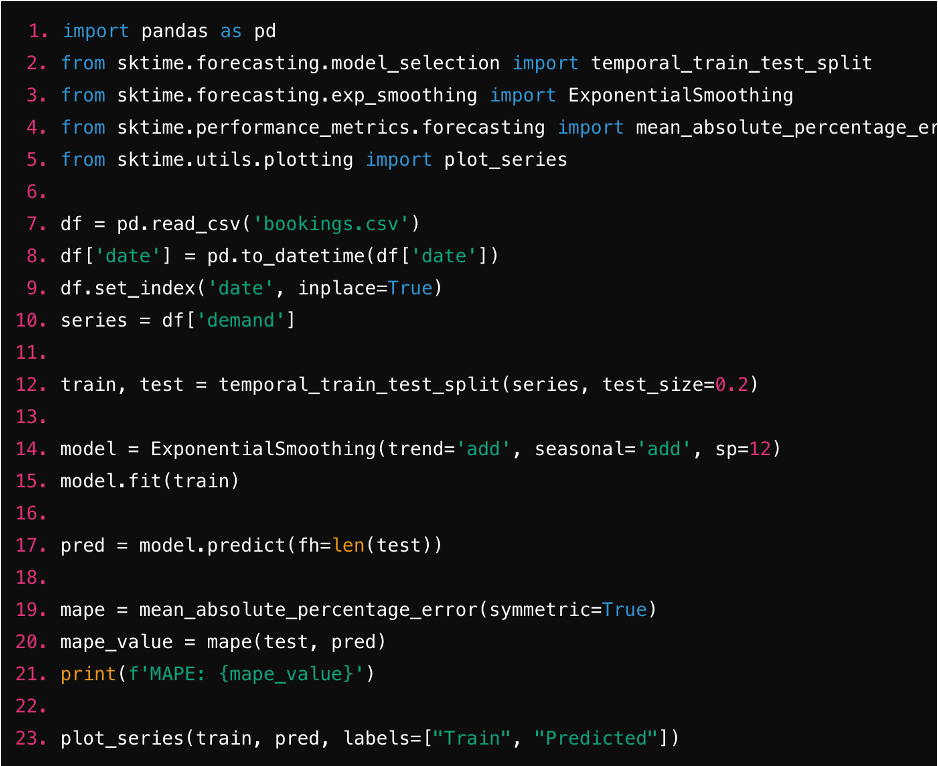

# Answar 4

## Question a:

In line 9 we reset the index to follow the order of the date variable. To make sure that they are ordered according to time, meaning that we can later performance time series analysis.

In line 12 we split the data(series) into 80% train and 20 % test, which resembles best practice learned from the machine learning part, thus ensuring that we don’t test on the model on the same data that it was trained on. 

Then in line 14 and 15 we first initiate/specify the model and then fit it on the training data. In this case the specified model is a one with Exponential smoothing, where the trend and seasonal component is additive. Furthermore seasonal periods (SP) is = 12 implying that we are looking at yearly patterns.

In line 17 we use the trained model, to make predictions on the test set by using len(test). Afterwards we calculate and display the MAPE in line 19-20. 
Lastly in line 23 we a time series plot, displaying both the true and predicted data.

## Question b: 

When doing timeseries forecasting using only the dependent variable itself it is hard to incorporate additional variables.
Especcialy dummy-variabel which are only 0 and 1. It will be hard to for the algoritm to find a pattern here.

Althogh there may be a pattern, that some holiday or weekend have the same date. Do to the fact that the year have 365 og 366 days, some patterns over time.
Furthermore patterns my not follow the SP = 12 as specified for demand variable.

Even if the algorithm was able to find these holidays, we would more move into a regressionlike problem. Where if we had holiday = 1 we would need some 
estimate of how et would affect demand.


## Question C.

I am a bit unsure of the way you are asking the question. But as i understand it you want us to display a different way of forecasting demand. 
If that is the case a different approach could be doing it through ML and prediction. This could be a random forrest approach, where we along side 
holiday, special events feed the algorithm. We could also calculate a trend and seasonal compont to use in the analysis.

If i where to use such an approch it would be nice to setup a pipeline, which prepears the data. This would make it 
easier to train and evaluate multiple models.


## Question 5

In [ ]:
try:
  from pulp import *
except:
  !pip install pulp
  from pulp import *

import numpy as np


# Example data
treatments = ['Basic Massage', 'Aromatherapy', 'Deep Tissue Massage']
price_range = np.arange(10, 101, 10)  # Pricing levels
a_values = {'Basic Massage': 1500, 'Aromatherapy': 2000, 'Deep Tissue Massage': 1600}
b_values = {'Basic Massage': 1.5, 'Aromatherapy': 1.2, 'Deep Tissue Massage': 1.3}
resource_usage_per_unit = {'Basic Massage': 1, 'Aromatherapy': 2, 'Deep Tissue Massage': 3}
total_resource_capacity = 50 # Total resource capacity (e.g., hours available from specialists)

demand = {}
for treatment in treatments:
    demand[treatment] = {}
    for p in price_range:
        demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0)

prob = LpProblem("Spa_Treatment_Profit_Maximization", LpMaximize)

price_vars = {}
for treatment in treatments:
  price_vars[treatment] = LpVariable.dicts(treatment+"price", price_range, cat='Binary')

prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)

# Constraint Block 1
for treatment in treatments:
    prob += lpSum(price_vars[treatment][price] for price in price_range) == 1

# Constraint Block 2
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment]
                   for treatment in treatments for price in price_range) <= total_resource_capacity

# Solve the problem
prob.solve(PULP_CBC_CMD(msg=False))


## Question A.

### Part 1
The pricelevels that are consideres is np.arange(10, 101, 10), meaning number from 10 to 100 with 10 between 
or more simply [10,20,30,40...90,100].

The demand is calculated using this: 

demand = {}
for treatment in treatments:
    demand[treatment] = {}
    for p in price_range:
        demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0)

It seems that we make a demand function for each prodcut with is exponentinally decreasing. 
In this case the intercept is a and the "power to which demand decrease i -b. 
Therefore when price increase the p** -b_vales get bigger and the demand gets lower.


### Part 2 
I am not quite sure, but my best guess would be that the demand function is not continus. Meaning that we
do not have an observation for each unique price value. 


## Question B

### Decision variables
As when we worked with the coffe example the decision variable are binary and determine the price for each product.
The format can be seen below, and shows that the dicision variable is the productsname and a price.
As this is binary, if it takes the value 1 we have choosen the price for the products.

They have this format:
{'Basic Massage': {np.int64(10): Basic_Massageprice_10,
  np.int64(20): Basic_Massageprice_20,
  np.int64(30): Basic_Massageprice_30,
  np.int64(40): Basic_Massageprice_40,
  np.int64(50): Basic_Massageprice_50,
  np.int64(60): Basic_Massageprice_60,
  np.int64(70): Basic_Massageprice_70,
  np.int64(80): Basic_Massageprice_80,
  np.int64(90): Basic_Massageprice_90,
  np.int64(100): Basic_Massageprice_100},

### Objective function:

This is the objective function:
lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)

It states that we take the binary dicision variable (price_vars) and multiply with demand for the given price 
and multiply by the price for all our products and price ranges. We choose to have all products and price_ranges
in the objective function as the prices not choosen, will be equal to 0 and therefore not affect the summation.


### Constraint

#### Constraint Block 1
for treatment in treatments:
    prob += lpSum(price_vars[treatment][price] for price in price_range) == 1

The first constraint tells us that the sum of the binary decision variable should
be equal to 1. This mean that we can only choose on price for the products



##### Constraint Block 2
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment]
                   for treatment in treatments for price in price_range) <= total_resource_capacity

The second decision variable is more straight foreward and tells us that ressource use
for all services may not exceed the capacity constraint of 50 working hours.

In [139]:
### Question C ###

# To keep it simple i just run the model from above and change the capicity to 30.

# Example data
treatments = ['Basic Massage', 'Aromatherapy', 'Deep Tissue Massage']
price_range = np.arange(10, 101, 10)  # Pricing levels
a_values = {'Basic Massage': 1500, 'Aromatherapy': 2000, 'Deep Tissue Massage': 1600}
b_values = {'Basic Massage': 1.5, 'Aromatherapy': 1.2, 'Deep Tissue Massage': 1.3}
resource_usage_per_unit = {'Basic Massage': 1, 'Aromatherapy': 2, 'Deep Tissue Massage': 3}
total_resource_capacity = 30 # CHANGED TO 30 !!!!!


demand = {}
for treatment in treatments:
    demand[treatment] = {}
    for p in price_range:
        demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0)

prob = LpProblem("Spa_Treatment_Profit_Maximization", LpMaximize)

price_vars = {}
for treatment in treatments:
  price_vars[treatment] = LpVariable.dicts(treatment+"price", price_range, cat='Binary')

prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)

# Constraint Block 1
for treatment in treatments:
    prob += lpSum(price_vars[treatment][price] for price in price_range) == 1

# Constraint Block 2
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment]
                   for treatment in treatments for price in price_range) <= total_resource_capacity

# Solve the problem
prob.solve(PULP_CBC_CMD(msg=False))


1

In [141]:
# Then i use the modified code from assignemnt 3 to get the objective value 
# and the var.value for each decision variable.

print(prob.objective.value())

# Extract chosen prices
chosen_prices = {} # Make a dictionary to store the names and the prices.
for treatment in treatments:
    chosen_prices[treatment] = [] # For all treatments i ad there names and a empty list for the price.

    # Then for each price in the price range, i check if the price is choosen for the each product
    # individually and then append add it to the dictonary.
    for price in price_range:
        if price_vars[treatment][price].varValue > 0.8:  # Check if the price is selected
            chosen_prices[treatment] = price


chosen_prices 

# As one can tell, the max profit with a constraint of 30 hours is = 1356 dollars.
# This is achived by setting the price to 90 dollars for Basic Massage,
# 100 dollars for Aromatherapy and 100 dollars for Deep Tissue Massage

1356.2300531569465


{'Basic Massage': np.int64(90),
 'Aromatherapy': np.int64(100),
 'Deep Tissue Massage': np.int64(100)}

In [147]:
### Question D ###

# Here i make a function taking the hours constraint as an input:

def create_and_solve_model(total_resource_capacity):
    demand = {}
    for treatment in treatments:
        demand[treatment] = {}
        for p in price_range:
            demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0)

    prob = LpProblem("Spa_Treatment_Profit_Maximization", LpMaximize)

    price_vars = {}
    for treatment in treatments:
        price_vars[treatment] = LpVariable.dicts(treatment+"price", price_range, cat='Binary')

    prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)

    # Constraint Block 1
    for treatment in treatments:
        prob += lpSum(price_vars[treatment][price] for price in price_range) == 1

        # Constraint Block 2
    prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment]
            for treatment in treatments for price in price_range) <= total_resource_capacity # This is now a variable which i can change later

    prob.solve(PULP_CBC_CMD(msg=False)) # Solve the model

    # If the model succed give me the objective value
    if prob.status == 1:
        # Revenue
        revenue = prob.objective.value()

        return revenue 
    else:   # If it fail do to a unsolvable solution, then give me 1
        return(-1)
    


In [150]:
results = [] # Empty list to store my results
Capacity = [20,30,40,50,60,70,80,90,100] # Different ranges of max hours i want to test.

# Then i run the model, with at all the different capacity levels.
for c in Capacity:
    revenue = create_and_solve_model(c) 
    results.append({"Capacity": c, "Revenue": revenue}) # Save results in my list

# I could not figure out how to retrive the demand from the model. 
# Therefore i only keep capacity and revenue and save this as a dataframe.
import pandas as pd 

df = pd.DataFrame(results)

# Display the dataframe
df

,Capacity,Revenue
0,20,-1.000000
1,30,1356.230053
2,40,1488.933381
3,50,1569.865233
4,60,1632.078504
5,70,1685.732661
6,80,1718.482559
7,90,1760.224955
8,100,1803.759854


<Axes: xlabel='Capacity', ylabel='Revenue'>

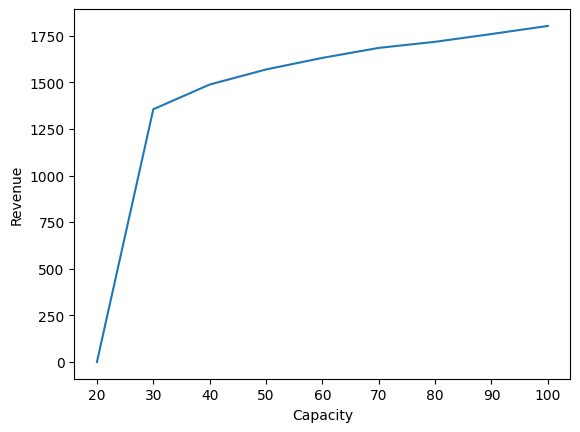

In [152]:
# Then i make the plot. 
# It is clear that the profit increase the most when we go from 20-30 hours.
# From here it still increases but at a lower pase.

sns.lineplot(data=df, x="Capacity",y="Revenue")